In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import pingouin as pg
import scipy.stats as st
import statsmodels.api as sm
%matplotlib inline

In [0]:
constructor = pd.read_csv('/content/constructors.csv')

In [0]:
constructor.drop(['url','Unnamed: 5' ],axis=1, inplace=True)

In [0]:
constructor_result = pd.read_csv('/content/constructorResults.csv')

In [0]:
constructor_result.drop(['status','constructorResultsId'],axis=1, inplace=True)

In [0]:
constructor_merged = pd.merge(constructor, constructor_result, how='inner', left_on='constructorId', right_on='constructorId')

In [0]:
results = pd.read_csv('/content/results.csv')
races = pd.read_csv('/content/races.csv')

In [0]:
races.drop(['url'], inplace=True, axis=1)

In [0]:
races.columns=['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'start_time']

In [0]:
results_races_merged = pd.merge(results, races, how='inner', right_on = 'raceId', left_on='raceId')

In [0]:
drivers = pd.read_csv('/content/drivers.csv',encoding='latin')

In [0]:
drivers.drop(['url','number'], inplace=True, axis=1)

In [0]:
driver_standing = pd.read_csv('/content/driverStandings.csv')

In [0]:
driver_standing.drop(['driverStandingsId'], axis=1, inplace=True)

In [0]:
driver_standing_merged = pd.merge(driver_standing, drivers, how='inner', left_on='driverId', right_on='driverId')

In [0]:
driver_standing_merged.drop(['positionText'], inplace=True, axis=1)

In [0]:
cons_stand = pd.read_csv('/content/constructorStandings.csv')

In [0]:
cons_stand.drop(['constructorStandingsId',  'Unnamed: 7'],axis=1, inplace=True)

In [0]:
status = pd.read_csv('/content/status.csv')

In [0]:
results_merged = pd.merge(results_races_merged, status, how='left', left_on='statusId', right_on='statusId')

In [25]:
results_merged.shape

(23777, 25)

In [26]:
driver_standing_merged.shape

(31726, 11)

In [27]:
constructor_merged.shape

(11142, 6)

In [28]:
cons_stand.shape

(11896, 6)

In [29]:
results_merged['number'].isnull().sum()

6

In [30]:
results_merged.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name',
       'date', 'start_time', 'status'],
      dtype='object')

In [0]:
results_merged.drop(['positionText', 'position', 'start_time',  'circuitId', 'number', 'grid', 'resultId','date', 'rank','fastestLap','fastestLapTime' ,'time'], axis=1, inplace=True)

In [32]:
results_merged.columns

Index(['raceId', 'driverId', 'constructorId', 'positionOrder', 'points',
       'laps', 'milliseconds', 'fastestLapSpeed', 'statusId', 'year', 'round',
       'name', 'status'],
      dtype='object')

In [0]:
results_merged.sort_values(by=['year'], inplace=True)

In [0]:
results_merged.reset_index(drop=True, inplace=True)

In [35]:
results_merged[results_merged['fastestLapSpeed']=='01:42.6']

,raceId,driverId,constructorId,positionOrder,points,laps,milliseconds,fastestLapSpeed,statusId,year,round,name,status
23513,988,839,10,8,4.0,55,5752973.0,01:42.6,1,2017,20,Abu Dhabi Grand Prix,Finished


In [0]:
results_merged.drop([23513], inplace=True)

In [0]:
results_merged['fastestLapSpeed']=results_merged['fastestLapSpeed'].astype('float32')

In [38]:
results_merged['fastestLapSpeed'].describe()

count    5382.000000
mean      200.745117
std        21.293182
min        89.540001
25%       190.634995
50%       202.447510
75%       213.839996
max       257.320007
Name: fastestLapSpeed, dtype: float64

In [39]:
results_merged.isna().sum()

raceId                 0
driverId               0
constructorId          0
positionOrder          0
points                 0
laps                   0
milliseconds       17774
fastestLapSpeed    18394
statusId               0
year                   0
round                  0
name                   0
status                 0
dtype: int64

In [0]:
temp_df1 = results_merged[results_merged['fastestLapSpeed'].notna()]

In [41]:
temp_df1

,raceId,driverId,constructorId,positionOrder,points,laps,milliseconds,fastestLapSpeed,statusId,year,round,name,status
18106,96,30,6,1,10.0,60,5555101.0,207.143997,1,2004,7,European Grand Prix,Finished
18108,95,21,15,19,0.0,2,NaN,148.804001,4,2004,6,Monaco Grand Prix,Collision
18109,95,45,17,15,0.0,12,NaN,151.406998,7,2004,6,Monaco Grand Prix,Transmission
18110,95,11,16,17,0.0,2,NaN,147.772995,5,2004,6,Monaco Grand Prix,Engine
18111,95,17,19,16,0.0,11,NaN,155.216003,6,2004,6,Monaco Grand Prix,Gearbox
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23772,975,807,4,8,4.0,70,5645528.0,206.203995,1,2017,7,Canadian Grand Prix,Finished
23773,975,8,6,7,6.0,70,5643786.0,208.250000,1,2017,7,Canadian Grand Prix,Finished
23774,975,839,10,6,8.0,70,5625870.0,205.904007,1,2017,7,Canadian Grand Prix,Finished
23775,975,4,1,16,0.0,66,NaN,206.973999,131,2017,7,Canadian Grand Prix,Power Unit


In [0]:
temp_df1.set_index(['name', 'year'], inplace=True)


In [0]:
temp_df1_sort = temp_df1.sort_index()

In [44]:
temp_df1_sort.loc[('Monaco Grand Prix',2004),:]

raceId  driverId  ...  round        status
name              year                    ...                     
Monaco Grand Prix 2004      95        21  ...      6     Collision
                  2004      95        45  ...      6  Transmission
                  2004      95        11  ...      6        Engine
                  2004      95        17  ...      6       Gearbox
                  2004      95        14  ...      6     Collision
                  2004      95        46  ...      6       Gearbox
                  2004      95         8  ...      6    Pneumatics
                  2004      95        30  ...      6     Collision
                  2004      95         4  ...      6      Accident
                  2004      95        15  ...      6      Finished
                  2004      95        22  ...      6      Finished
                  2004      95        31  ...      6        +1 Lap
                  2004      95        13  ...      6        +1 Lap
                  2004      95        43  ...      6        +1 Lap
                  2004      95         2  ...      6       +2 Laps
                  2004      95        44  ...      6       +3 Laps
                  2004      95        47  ...      6       +6 Laps
                  2004      95        23  ...      6       Gearbox
                  2004      95        18  ...      6      Finished

[19 rows x 11 columns]

In [45]:
temp_df1_sort.loc[('Monaco Grand Prix',2004),:]['fastestLapSpeed'].max()

161.5279998779297

In [0]:
first=[]

In [0]:
for i in temp_df1_sort.index:
    first.append(i)

In [0]:
first = sorted(list(set(first)))

In [49]:
len(first)

262

In [0]:
my_dict = dict()

In [0]:
for i in first:
    #print(temp_df1_sort.loc[i,:]['fastestLapSpeed'].max())
    my_dict[i] = temp_df1_sort.loc[i,:]['fastestLapSpeed'].max()

In [0]:
a,b = [], []
for k,v in my_dict.items():
    a.append(k)
    b.append(v)

In [0]:
df_ =pd.DataFrame({'name':a, 'speed':b})

In [0]:
gp=[]
for i in first:
    gp.append(i[0])
gp = sorted(list(set(gp)))

In [0]:
df_[['GP_name', 'year']] = pd.DataFrame(df_['name'].values.tolist(), index=df_.index)

In [0]:
df_.drop('name', inplace=True, axis=1)

In [0]:
df_ = df_[['GP_name', 'year', 'speed']]

In [0]:
df_.set_index(['GP_name'], inplace=True)

In [59]:
df_

,year,speed
GP_name,,
Abu Dhabi Grand Prix,2009,199.386993
Abu Dhabi Grand Prix,2010,197.427994
Abu Dhabi Grand Prix,2011,194.854004
Abu Dhabi Grand Prix,2012,192.320007
Abu Dhabi Grand Prix,2013,193.304993
...,...,...
United States Grand Prix,2013,198.753998
United States Grand Prix,2014,195.768005
United States Grand Prix,2015,197.154007


In [0]:
df_['Race']=df_.index

Text(0.5, 0.98, 'Fastest Lap in each Grand Prix (2004-2017)')

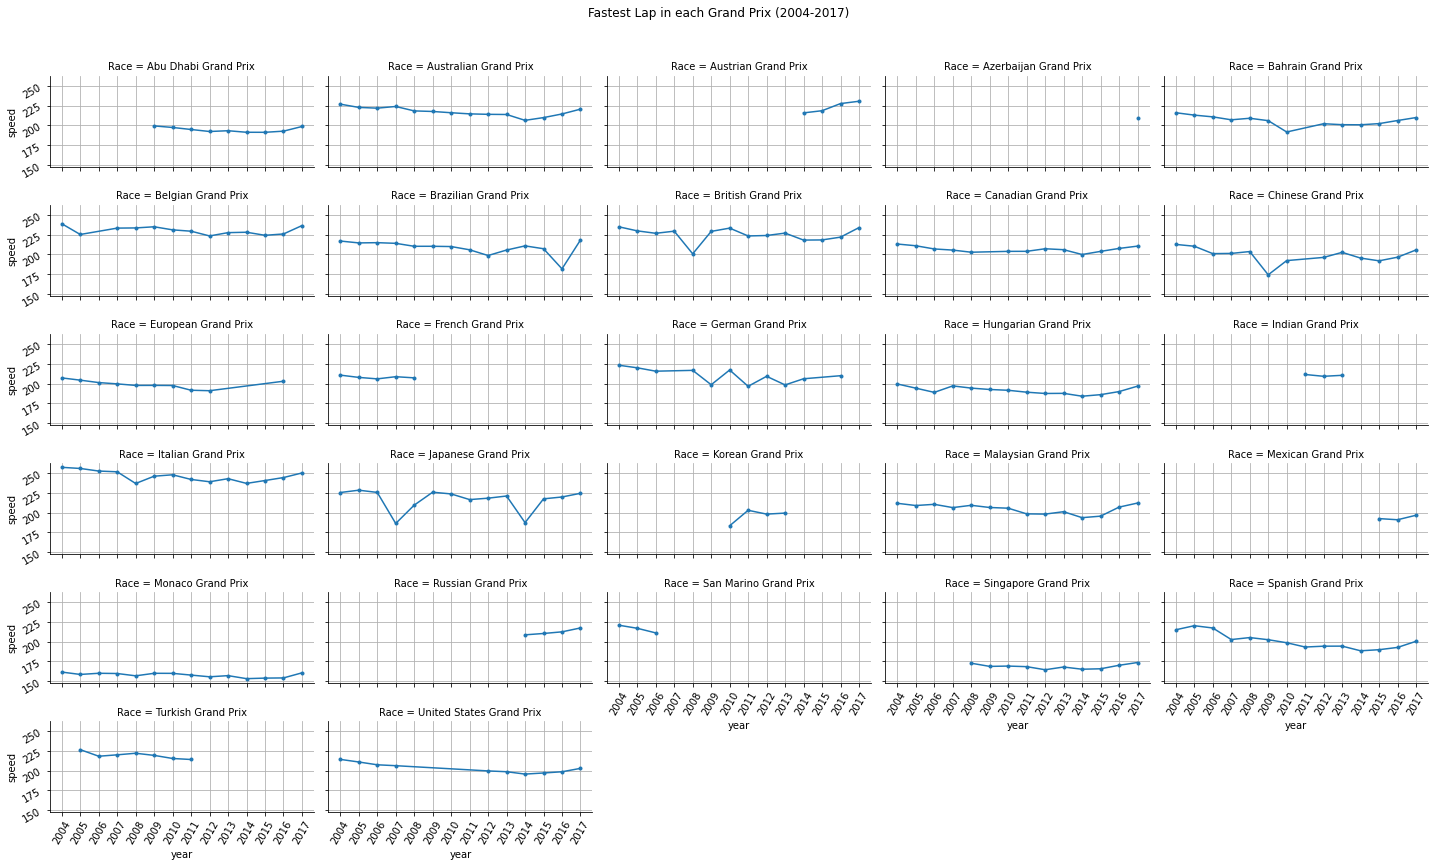

In [61]:
g = sns.FacetGrid(df_, col='Race',col_wrap=5, height=2,aspect=2)
g = g.map(plt.plot,'year', "speed",marker=".").set(xticks=list(sorted(df_['year'].unique())), yticks=[150, 175, 200, 225, 250])
#g.set(xticks=df_['year'])
#plt.grid(b=True, which='major', color='#666666', linestyle='-')
for ax in g.axes.flat:
    for label in ax.get_yticklabels():
        label.set_rotation(30)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(60)
for ax in g.axes.flat:
    ax.grid(b=True, which='major')
    ax.grid(b=True, which='minor')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Fastest Lap in each Grand Prix (2004-2017)')
#plt.savefig('lapspeed.png', bbox_inches='tight')

In [62]:
results_merged.head()


,raceId,driverId,constructorId,positionOrder,points,laps,milliseconds,fastestLapSpeed,statusId,year,round,name,status
0,835,559,113,10,0.0,135,NaN,NaN,13,1950,3,Indianapolis 500,+3 Laps
1,835,796,158,22,0.0,123,NaN,NaN,112,1950,3,Indianapolis 500,+15 Laps
2,835,659,113,21,0.0,125,NaN,NaN,53,1950,3,Indianapolis 500,+13 Laps
3,835,677,105,20,0.0,126,NaN,NaN,55,1950,3,Indianapolis 500,+12 Laps
4,835,771,113,19,0.0,127,NaN,NaN,45,1950,3,Indianapolis 500,+11 Laps


In [63]:
driver_standing_merged.head()


,raceId,driverId,points,position,wins,driverRef,code,forename,surname,dob,nationality
0,18,1,10.0,1,1,hamilton,HAM,Lewis,Hamilton,07/01/1985,British
1,19,1,14.0,1,1,hamilton,HAM,Lewis,Hamilton,07/01/1985,British
2,20,1,14.0,3,1,hamilton,HAM,Lewis,Hamilton,07/01/1985,British
3,21,1,20.0,2,1,hamilton,HAM,Lewis,Hamilton,07/01/1985,British
4,22,1,28.0,3,1,hamilton,HAM,Lewis,Hamilton,07/01/1985,British


In [64]:
constructor_merged.head()


,constructorId,constructorRef,name,nationality,raceId,points
0,1,mclaren,McLaren,British,18,14.0
1,1,mclaren,McLaren,British,19,10.0
2,1,mclaren,McLaren,British,20,4.0
3,1,mclaren,McLaren,British,21,6.0
4,1,mclaren,McLaren,British,22,8.0


In [65]:
cons_stand.head()

,raceId,constructorId,points,position,positionText,wins
0,18,1,14.0,1,1,1
1,18,2,8.0,3,3,0
2,18,3,9.0,2,2,0
3,18,4,5.0,4,4,0
4,18,5,2.0,5,5,0


In [0]:
cons_stand.sort_values(by=['raceId', 'position'], inplace=True)

In [67]:
cons_stand

,raceId,constructorId,points,position,positionText,wins
3674,1,23,18.0,1,1,1
3673,1,7,11.0,2,2,0
3672,1,4,4.0,3,3,0
3671,1,3,3.0,4,4,0
3670,1,5,3.0,5,5,0
...,...,...,...,...,...,...
11892,988,4,57.0,6,6,0
11891,988,5,53.0,7,7,0
11895,988,210,47.0,8,8,0
11894,988,1,30.0,9,9,0


In [0]:
temp_df2 = constructor_merged.drop(['points', 'raceId'], axis=1)

In [0]:
temp_df2 = temp_df2.drop_duplicates(keep='first')

In [70]:
temp_df2

,constructorId,constructorRef,name,nationality
0,1,mclaren,McLaren,British
780,2,bmw_sauber,BMW Sauber,German
851,3,williams,Williams,British
1546,4,renault,Renault,French
1890,5,toro_rosso,Toro Rosso,Italian
...,...,...,...,...
10870,206,marussia,Marussia,Russian
10929,207,caterham,Caterham,Malaysian
10985,208,lotus_f1,Lotus F1,British
11062,209,manor,Manor Marussia,British


In [0]:
temp_df2 = pd.merge(results_merged, temp_df2, how='inner', left_on='constructorId', right_on='constructorId')

In [0]:
temp_df2.sort_values(by=['raceId', 'positionOrder'], inplace=True)

In [0]:
temp_l = list(temp_df2.columns)
temp_l[11] = 'race_name'
temp_l[14] = 'constructor_name'

In [0]:
temp_df2.columns=temp_l

In [0]:
temp_df2.reset_index(drop=True, inplace=True)

In [76]:
temp_df2

,raceId,driverId,constructorId,positionOrder,points,laps,milliseconds,fastestLapSpeed,statusId,year,round,race_name,status,constructorRef,constructor_name,nationality
0,1,18,23,1,10.0,58,5655784.0,216.891006,1,2009,1,Australian Grand Prix,Finished,brawn,Brawn,British
1,1,22,23,2,8.0,58,5656591.0,214.343994,1,2009,1,Australian Grand Prix,Finished,brawn,Brawn,British
2,1,15,7,3,6.0,58,5657388.0,214.705994,1,2009,1,Australian Grand Prix,Finished,toyota,Toyota,Japanese
3,1,10,7,4,5.0,58,5660219.0,215.919998,1,2009,1,Australian Grand Prix,Finished,toyota,Toyota,Japanese
4,1,4,4,5,4.0,58,5660663.0,215.199005,1,2009,1,Australian Grand Prix,Finished,renault,Renault,French
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23483,988,842,5,16,0.0,54,NaN,192.542007,11,2017,20,Abu Dhabi Grand Prix,+1 Lap,toro_rosso,Toro Rosso,Italian
23484,988,828,15,17,0.0,54,NaN,193.057007,11,2017,20,Abu Dhabi Grand Prix,+1 Lap,sauber,Sauber,Swiss
23485,988,840,3,18,0.0,54,NaN,195.401993,11,2017,20,Abu Dhabi Grand Prix,+1 Lap,williams,Williams,British
23486,988,832,4,19,0.0,31,NaN,193.410004,36,2017,20,Abu Dhabi Grand Prix,Wheel,renault,Renault,French


In [0]:
top_10=temp_df2.groupby('raceId').head(10).reset_index(drop=True)

In [0]:
top_5=temp_df2.groupby('raceId').head(5).reset_index(drop=True)

In [0]:
top_3=temp_df2.groupby('raceId').head(3).reset_index(drop=True)

In [0]:
top_1 = temp_df2.groupby('raceId').head(1).reset_index(drop=True)

In [0]:
c=[1,3,5,10]
a1=[]
for h in c:
    dff = temp_df2.groupby('raceId').head(h).reset_index(drop=True)
    dff['freq'] = dff.groupby('nationality')['nationality'].transform('count')
    dff.sort_values(by=['freq'], ascending=False, inplace=True)
    dff = dff.drop_duplicates(subset=['nationality'])
    dff.reset_index(drop=True, inplace=True)
    dff = dff[['freq','nationality']]
    a1.append(dff)

In [0]:
dff1,dff3,dff5,dff10 = a1[0], a1[1], a1[2], a1[3]

In [0]:
nation_df = pd.merge(dff1, dff3 , how='inner', left_on='nationality', right_on='nationality')

In [0]:
nation_df = pd.merge(nation_df, dff5 , how='inner', left_on='nationality', right_on='nationality')

In [0]:
nation_df = pd.merge(nation_df, dff10 , how='inner', left_on='nationality', right_on='nationality')

In [0]:
nation_df.columns = ['top', 'nationality', 'top3', 'top5', 'top10']

In [0]:
nation_df = nation_df[[ 'nationality', 'top','top3', 'top5', 'top10']]

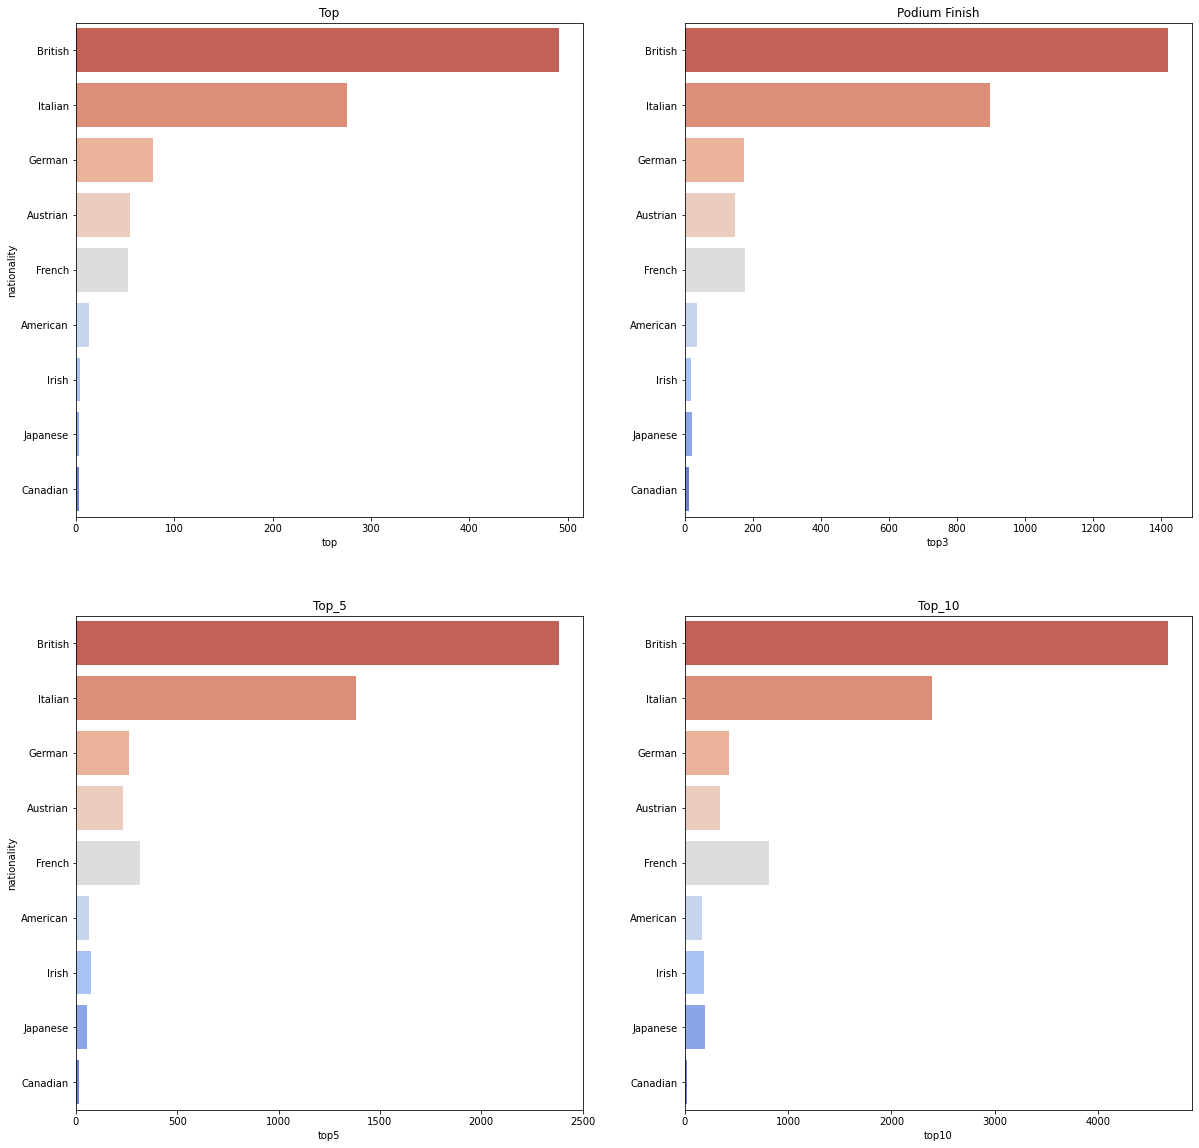

In [88]:
fig = plt.figure(figsize=(20,20))
plt.subplot(221)
_=sns.barplot(x='top', y='nationality', data=nation_df[:30],palette='coolwarm_r').set_title('Top')
plt.subplot(222)
_=sns.barplot(x='top3', y='nationality', data=nation_df[:30],palette='coolwarm_r').set_title("Podium Finish")
_ =ax= plt.gca()
_= ax.set_ylabel('')
plt.subplot(223)
_=sns.barplot(x='top5', y='nationality', data=nation_df[:30],palette='coolwarm_r').set_title("Top_5")
plt.subplot(224)
_=sns.barplot(x='top10',y='nationality', data=nation_df[:30],palette='coolwarm_r').set_title("Top_10")
_ =ax= plt.gca()
_= ax.set_ylabel('')
#plt.savefig('nationality.png', bbox_inches='tight')

In [0]:
top_10['freq'] = top_10.groupby('constructor_name')['constructor_name'].transform('count')

In [0]:
top_5['freq'] = top_5.groupby('constructor_name')['constructor_name'].transform('count')

In [0]:
top_3['freq'] =top_3.groupby('constructor_name')['constructor_name'].transform('count')

In [0]:
top_1['freq'] = top_1.groupby('constructor_name')['constructor_name'].transform('count')

In [0]:
top_10.sort_values(by=['freq'], ascending=False, inplace=True)

In [0]:
top_5.sort_values(by=['freq'], ascending=False, inplace=True)

In [0]:
top_3.sort_values(by=['freq'], ascending=False, inplace=True)

In [0]:
top_1.sort_values(by=['freq'], ascending=False, inplace=True)

In [0]:
freq_10 = top_10.drop_duplicates(subset=['constructor_name'])

In [0]:
freq_5 = top_5.drop_duplicates(subset=['constructor_name'])

In [0]:
freq_3 = top_3.drop_duplicates(subset=['constructor_name'])

In [0]:
freq_1 = top_1.drop_duplicates(subset=['constructor_name'])

In [0]:
freq_10.reset_index(drop=True, inplace=True)

In [0]:
freq_5.reset_index(drop=True, inplace=True)

In [0]:
freq_3.reset_index(drop=True, inplace=True)

In [0]:
freq_1.reset_index(drop=True, inplace=True)

In [0]:
freq_1 = freq_1[['constructor_name', 'freq', 'nationality',  'constructorId']]

In [0]:
freq_3 = freq_3[['constructor_name', 'freq']]

In [0]:
freq_5 = freq_5[['constructor_name', 'freq']]

In [0]:
freq_10 = freq_10[['constructor_name', 'freq']]

In [0]:
final_freq = pd.merge(freq_1, freq_3, how='inner', left_on='constructor_name', right_on='constructor_name')

In [0]:
final_freq = pd.merge(final_freq, freq_5, how='inner', left_on='constructor_name', right_on='constructor_name')

In [0]:
final_freq = pd.merge(final_freq, freq_10, how='inner', left_on='constructor_name', right_on='constructor_name')

In [0]:
final_freq.columns = ['constructor_name', 'top_position', 'nationality', 'constructorId', 'top3_finish', 'top5_finish', 'top10_finish']

In [0]:
final_freq = final_freq[['constructor_name', 'constructorId', 'nationality', 'top_position', 'top3_finish', 'top5_finish', 'top10_finish']]

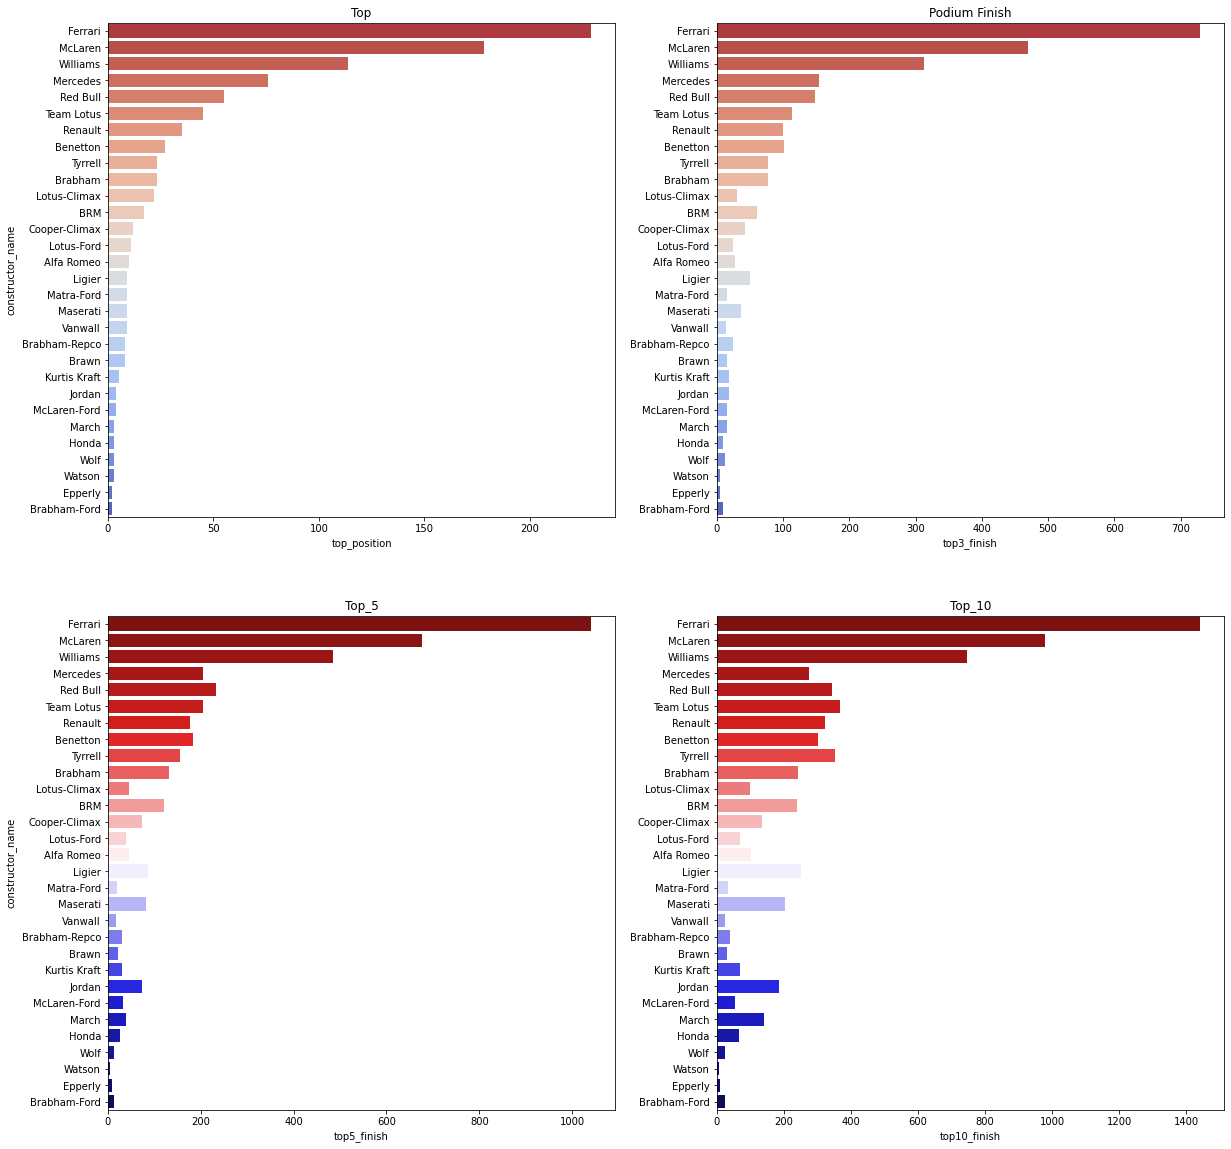

In [114]:
fig = plt.figure(figsize=(20,20))
plt.subplot(221)
_=sns.barplot(x='top_position', y='constructor_name', data=final_freq[:30],palette='coolwarm_r').set_title('Top')
plt.subplot(222)
_=sns.barplot(x='top3_finish', y='constructor_name', data=final_freq[:30],palette='coolwarm_r').set_title("Podium Finish")
_ =ax= plt.gca()
_= ax.set_ylabel('')
plt.subplot(223)
_=sns.barplot(x='top5_finish', y='constructor_name', data=final_freq[:30],palette='seismic_r').set_title("Top_5")
plt.subplot(224)
_=sns.barplot(x='top10_finish',y='constructor_name', data=final_freq[:30],palette='seismic_r').set_title("Top_10")
_ =ax= plt.gca()
_= ax.set_ylabel('')
#plt.savefig('Constructors.png', bbox_inches='tight')

Text(0.5, 1.0, 'Density Plot of Constructors for Top, Top3, Top5, Top10 Finishes')

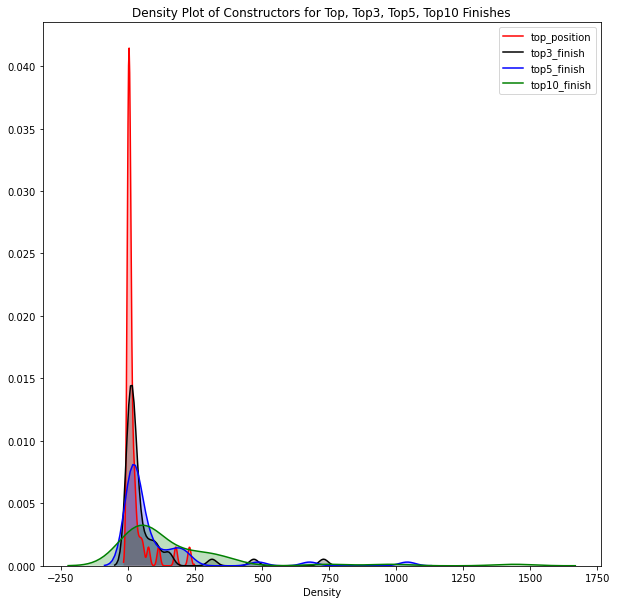

In [115]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.kdeplot(final_freq['top_position'], 
               color='red',
               shade=True)
ax=sns.kdeplot(final_freq['top3_finish'], 
               color='black',
               shade=True)
ax=sns.kdeplot(final_freq['top5_finish'], 
               color='blue',
               shade=True)
ax=sns.kdeplot(final_freq['top10_finish'], 
               color='green',
               shade=True)
ax.set_xlabel('Density')
ax.set_title('Density Plot of Constructors for Top, Top3, Top5, Top10 Finishes')
#plt.savefig('density_cons.png', bbox_inches='tight')

In [116]:
temp_df2

,raceId,driverId,constructorId,positionOrder,points,laps,milliseconds,fastestLapSpeed,statusId,year,round,race_name,status,constructorRef,constructor_name,nationality
0,1,18,23,1,10.0,58,5655784.0,216.891006,1,2009,1,Australian Grand Prix,Finished,brawn,Brawn,British
1,1,22,23,2,8.0,58,5656591.0,214.343994,1,2009,1,Australian Grand Prix,Finished,brawn,Brawn,British
2,1,15,7,3,6.0,58,5657388.0,214.705994,1,2009,1,Australian Grand Prix,Finished,toyota,Toyota,Japanese
3,1,10,7,4,5.0,58,5660219.0,215.919998,1,2009,1,Australian Grand Prix,Finished,toyota,Toyota,Japanese
4,1,4,4,5,4.0,58,5660663.0,215.199005,1,2009,1,Australian Grand Prix,Finished,renault,Renault,French
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23483,988,842,5,16,0.0,54,NaN,192.542007,11,2017,20,Abu Dhabi Grand Prix,+1 Lap,toro_rosso,Toro Rosso,Italian
23484,988,828,15,17,0.0,54,NaN,193.057007,11,2017,20,Abu Dhabi Grand Prix,+1 Lap,sauber,Sauber,Swiss
23485,988,840,3,18,0.0,54,NaN,195.401993,11,2017,20,Abu Dhabi Grand Prix,+1 Lap,williams,Williams,British
23486,988,832,4,19,0.0,31,NaN,193.410004,36,2017,20,Abu Dhabi Grand Prix,Wheel,renault,Renault,French


In [0]:
driver_10=temp_df2.groupby('raceId').head(10).reset_index(drop=True)

In [0]:
#driver_10=temp_df2.groupby('raceId').head(10).reset_index(drop=True)

In [0]:
i=[1,3,5,10]
a=[]
for h in i:
    df = temp_df2.groupby('raceId').head(h).reset_index(drop=True)
    df['freq'] = df.groupby('driverId')['driverId'].transform('count')
    df.sort_values(by=['freq'], ascending=False, inplace=True)
    df = df.drop_duplicates(subset=['driverId'])
    df.reset_index(drop=True, inplace=True)
    df = df[['freq','driverId']]
    a.append(df)

In [0]:
df1,df3,df5,df10 = a[0], a[1], a[2], a[3]

In [0]:
driver_name = driver_standing_merged.drop_duplicates(subset=['driverId'])

In [0]:
driver_name = driver_name[['driverId', 'driverRef','forename', 'surname', 'nationality' ]]

In [0]:
driver_df = pd.merge(df1, driver_name, how='inner', left_on='driverId', right_on='driverId')

In [0]:
driver_df = pd.merge(driver_df, df3, how='inner', left_on='driverId', right_on='driverId')

In [0]:
driver_df = pd.merge(driver_df, df5, how='inner', left_on='driverId', right_on='driverId')
driver_df = pd.merge(driver_df, df10, how='inner', left_on='driverId', right_on='driverId')

In [0]:
driver_df.columns = ['top', 'driverId', 'driverRef', 'forename', 'surname', 'nationality', 'top3', 'top5', 'top10']

In [0]:
driver_df = driver_df[['driverId', 'driverRef', 'forename', 'surname', 'nationality','top', 'top3', 'top5', 'top10']]

# 

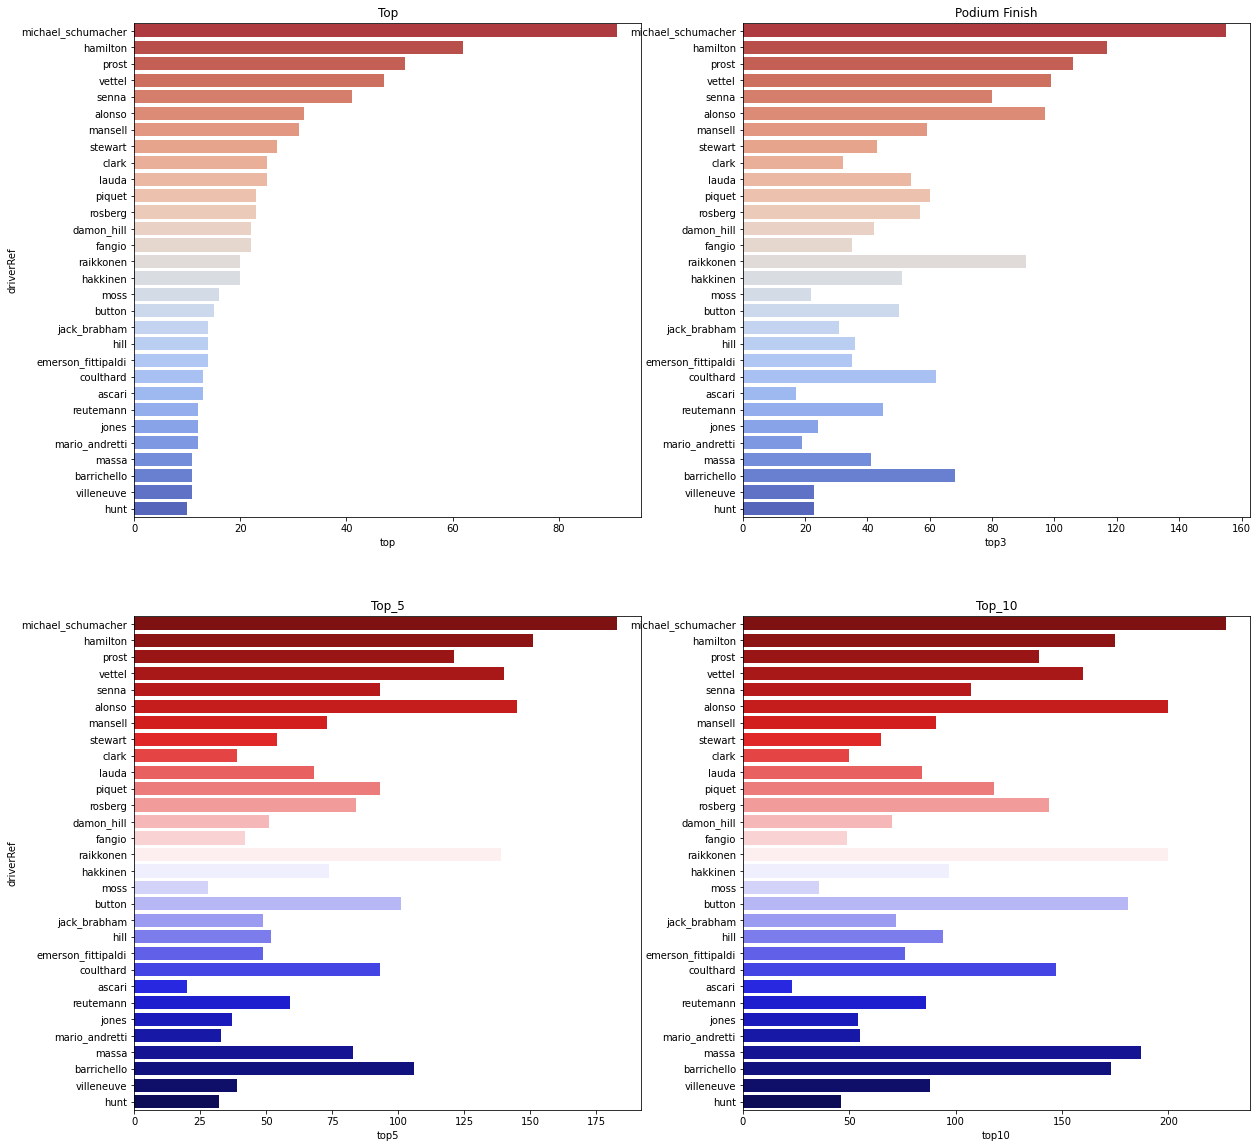

In [128]:
fig = plt.figure(figsize=(20,20))
plt.subplot(221)
_=sns.barplot(x='top', y='driverRef', data=driver_df[:30],palette='coolwarm_r').set_title('Top')
plt.subplot(222)
_=sns.barplot(x='top3', y='driverRef', data=driver_df[:30],palette='coolwarm_r').set_title("Podium Finish")
_ =ax= plt.gca()
_= ax.set_ylabel('')
plt.subplot(223)
_=sns.barplot(x='top5', y='driverRef', data=driver_df[:30],palette='seismic_r').set_title("Top_5")
plt.subplot(224)
_=sns.barplot(x='top10',y='driverRef', data=driver_df[:30],palette='seismic_r').set_title("Top_10")
_ =ax= plt.gca()
_= ax.set_ylabel('')
#plt.savefig('Constructors.png', bbox_inches='tight')

Text(0.5, 1.0, 'Density Plot of Drivers for Top, Top3, Top5, Top10 Finishes')

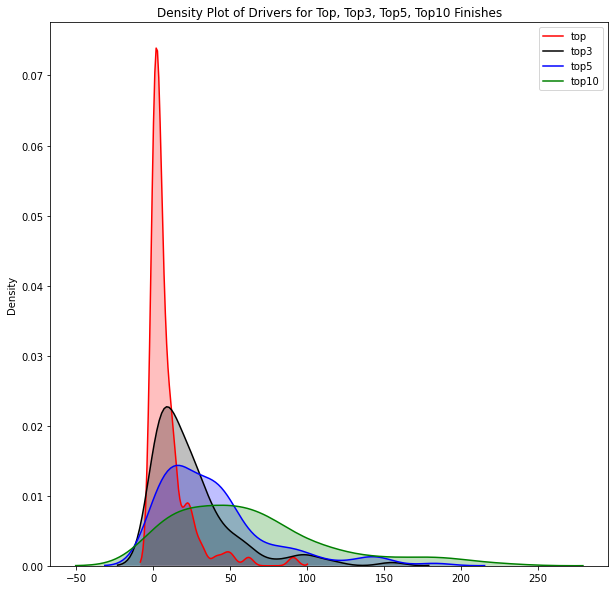

In [129]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.kdeplot(driver_df['top'], 
               color='red',
               shade=True)
ax=sns.kdeplot(driver_df['top3'], 
               color='black',
               shade=True)
ax=sns.kdeplot(driver_df['top5'], 
               color='blue',
               shade=True)
ax=sns.kdeplot(driver_df['top10'], 
               color='green',
               shade=True)
ax.set_ylabel('Density')
ax.set_title('Density Plot of Drivers for Top, Top3, Top5, Top10 Finishes')
#plt.savefig('density_driver.png', bbox_inches='tight')

In [143]:
import plotly.express as px
import plotly.io as pio
fig = px.bar(driver_df[:30], y="top", x="driverRef", color='nationality')
fig.show()

In [144]:
fig = px.bar(final_freq[:30], y="top_position", x="constructor_name", color='nationality')
fig.show()

In [0]:
temp_df3 = temp_df2[temp_df2['fastestLapSpeed'].notna()]

In [159]:
temp_df3.sort_values(by=['fastestLapSpeed'],inplace=True,ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
temp_df3_10 = temp_df3[:10]

In [0]:
drivers_list = ['barrichello', 'michael_schumacher', 'raikkonen', 'montoya', 'alonso', 'pizzonia', 'raikkonen', 'michael_schumacher','fisichella', 'fisichella' ]

In [174]:
temp_df3_10['driver_name']=drivers_list

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
temp_df3_10.to_csv('drivers_lap.csv')

In [0]:
driver_df = driver_df[['top', 'top3', 'top5', 'top10']]

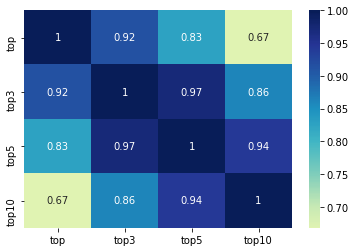

In [193]:
corr = driver_df.corr()
mask = np.zeros_like(corr)
sns.heatmap(corr,center=0.8,annot=True,cmap="YlGnBu",mask=mask)